In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import pandas as pd
import h5py
from skimage.transform import resize
from tqdm import tqdm

In [2]:
train_df = pd.read_csv('../data/train.csv')
print(train_df.shape)
train_df.head()

(21806, 2)


,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0


In [5]:
hpa_cell_mask_list = os.listdir('../data/hpa_cell_mask')
print(hpa_cell_mask_list[:10])

['5b4a9712-bb9c-11e8-b2b9-ac1f6b6435d0.npz', 'e5c0bf54-bbb8-11e8-b2ba-ac1f6b6435d0.npz', 'f964b18e-bbac-11e8-b2ba-ac1f6b6435d0.npz', '8d2260ae-bbbe-11e8-b2ba-ac1f6b6435d0.npz', '776fe4c0-bba0-11e8-b2b9-ac1f6b6435d0.npz', '83600d0a-bbb9-11e8-b2ba-ac1f6b6435d0.npz', 'e39be6d8-bba7-11e8-b2ba-ac1f6b6435d0.npz', 'd01751ae-bba4-11e8-b2ba-ac1f6b6435d0.npz', 'cb0daad6-bbaa-11e8-b2ba-ac1f6b6435d0.npz', 'a9aaf8ae-bbc7-11e8-b2bc-ac1f6b6435d0.npz']


In [23]:
img_mask = np.load(os.path.join('../data/hpa_cell_mask',hpa_cell_mask_list[0]))['arr_0'].astype(np.uint8)

(2048, 2048)


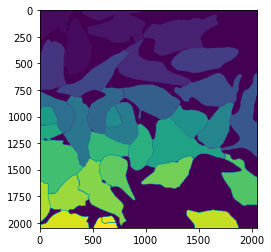

In [24]:
print(img_mask.shape)
plt.imshow(img_mask)

In [3]:

print(image.shape)
#plt.imshow(img_red)

(2048, 2048, 4)


In [16]:


def img_splitter(im_tok):
    #img_filename = img_token+'.png'
    
    file_name.append(im_tok)
    img_red    = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_red.png')), axis = -1)
    img_yellow = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_yellow.png')), axis = -1)
    img_green  = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_green.png')), axis = -1)
    img_blue   = np.expand_dims(imageio.imread(os.path.join('../data/train',f'{im_tok}_blue.png')), axis = -1)
    image = np.concatenate([img_red, img_yellow, img_green, img_blue], axis=-1)
    img_mask = np.load(os.path.join('../data/hpa_cell_mask',f'{im_tok}.npz'))['arr_0'].astype(np.uint8)

    #area_list = []
    crop_img_list = []
    
    selected_cell_count = 0
    total_cell_mask.append(img_mask.max())
    for i in range(1, img_mask.max() + 1):
        bmask = img_mask == i
        bmask = np.expand_dims(bmask, axis = -1)
        bmask = np.concatenate([bmask, bmask, bmask, bmask], axis=-1)
        masked_img = image * bmask

        true_points = np.argwhere(bmask)
        top_left = true_points.min(axis=0)
        bottom_right = true_points.max(axis=0)
        cropped_arr = masked_img[top_left[0]:bottom_right[0]+1,top_left[1]:bottom_right[1]+1]
        #print(cropped_arr.shape)
        #print('Area: ',cropped_arr.shape[0] * cropped_arr.shape[1])
        if cropped_arr.shape[0] * cropped_arr.shape[1] > 100000:
            selected_cell_count += 1
            #print(cropped_arr.min(), cropped_arr.max())
            cropped_arr = resize(cropped_arr, (224, 224))
            #print(cropped_arr.min(), cropped_arr.max())
            #area_list.append(cropped_arr.shape[0] * cropped_arr.shape[1]
            #crop_img_list.append(cropped_arr)
            
            #pass
    crop_img_arr = np.array(crop_img_list)

    selected_cells.append(selected_cell_count)
    return None #crop_img_list
    

In [4]:
img_token_list = train_df['ID'].values

In [17]:
file_name = []
total_cell_mask = []
selected_cells = []


for i in  img_token_list:#[:3]:
    crop_img_list = img_splitter(i)
    
v = {'token':file_name,'total_cell_mask':total_cell_mask,'selected_cells':selected_cells}
v_df = pd.DataFrame.from_dict(v)
v_df.to_csv('../data/cell_mask_study.csv')

KeyboardInterrupt: 

In [7]:
total_cell_mask

[8, 15, 17]

In [8]:
selected_cells

[6, 13, 15]

In [30]:
i_token = '8f17b5f4-bbae-11e8-b2ba-ac1f6b6435d0'
crop_img_list = img_splitter(i_token)
print('-------------------------------------')
i_token = 'fadce44c-bba6-11e8-b2ba-ac1f6b6435d0'
crop_img_list = img_splitter(i_token)
print('-------------------------------------')
i_token = '32913e30-bbaa-11e8-b2ba-ac1f6b6435d0'
crop_img_list = img_splitter(i_token)
print('-------------------------------------')
i_token = '7930e80e-bbc8-11e8-b2bc-ac1f6b6435d0'
crop_img_list = img_splitter(i_token)
print('-------------------------------------')
i_token = 'dd222ce2-bba5-11e8-b2ba-ac1f6b6435d0'
crop_img_list = img_splitter(i_token)
print('-------------------------------------')

Area:  39216
Area:  92016
Area:  87808
Area:  25872
Area:  21504
Area:  87168
Area:  13446
Area:  91176
-------------------------------------
Area:  53940
Area:  47632
Area:  33792
Area:  34125
Area:  11845
Area:  13500
Area:  35055
Area:  41268
Area:  54285
Area:  36503
Area:  69616
Area:  35640
Area:  22742
Area:  50218
Area:  20828
Area:  47672
Area:  44440
Area:  36816
Area:  25217
Area:  53760
Area:  61596
Area:  36481
Area:  62080
Area:  31304
Area:  44608
Area:  63288
-------------------------------------
Area:  88040
Area:  27216
Area:  54944
Area:  50032
Area:  44096
Area:  49392
Area:  37888
Area:  80640
Area:  28000
Area:  32640
Area:  35568
Area:  69120
Area:  58656
Area:  37600
Area:  30240
Area:  45792
Area:  65072
-------------------------------------
Area:  16128
-------------------------------------
Area:  92960
Area:  18032
Area:  33024
Area:  38640
Area:  30576
-------------------------------------


In [23]:
len(crop_img_list)

0

In [22]:
crop_img_list[-13][:,:,0].shape

(224, 224)

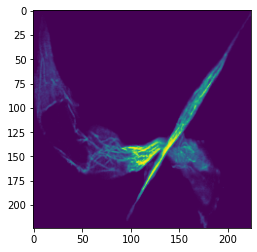

In [30]:
plt.imshow(crop_img_list[-12][:,:,0])

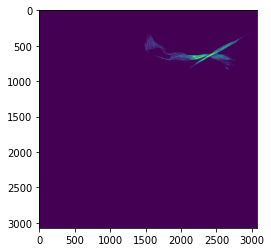

In [31]:
plt.imshow(mask_img_list[-12][:,:,0])

In [49]:
area_list

[294516,
 188480,
 272764,
 311190,
 118096,
 154548,
 304920,
 201608,
 275616,
 175480,
 148519,
 128310,
 186093,
 125928,
 150768,
 32494,
 108810,
 29548,
 351130,
 31930,
 103332,
 116230,
 206444,
 166896,
 143472,
 152694,
 299376,
 136964,
 38121,
 82960,
 77154,
 9030,
 22848]

In [5]:
hdf5_path = os.path.join('../data/train_h5_224',f'{"5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0"}.hdf5')
hdf5_file = h5py.File(hdf5_path,"r")
train_x = hdf5_file['train_img']
train_x.shape

(17, 224, 224, 4)

In [6]:
train_x[0].shape

(224, 224, 4)

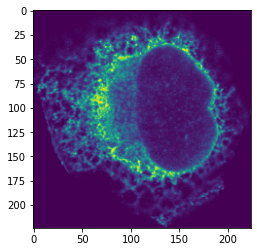

In [10]:
plt.imshow(train_x[14][:,:,1])

## stratified splitting

In [3]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import random 
import os

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

In [4]:
train_df = pd.read_csv('../data/train.csv')
print(train_df.shape)
train_df.head()

(21806, 2)


,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0


In [5]:
labels = [str(i) for i in range(19)]
for x in labels: train_df[x] = train_df['Label'].apply(lambda r: int(x in r.split('|')))

In [6]:
train_df.head()

,ID,Label,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
SEED = 1
FOLDS = 5
set_seed(SEED)

In [11]:
skf = MultilabelStratifiedKFold(n_splits=FOLDS, shuffle=True, 
          random_state=SEED)
labels = [str(i) for i in range(19)]
print(labels)


train_df['fold'] = -1
for fold,(idxT,idxV) in enumerate( skf.split(train_df,train_df[labels].values)):
    train_df['fold'][idxV] = fold

train_df.head()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ID,Label,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,fold
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
print(train_df[train_df['fold'] != 1].shape)
print(train_df[train_df['fold'] == 1].shape)

(17468, 22)
(4338, 22)


In [7]:
from utils import hpa_dataset
import pandas as pd
import os
import h5py

In [2]:
train_df = pd.read_csv('../data/train_fold_v1.csv')
train_dataset = hpa_dataset( train_df, augmentation = None, path='../data/train_h5_224',  aug_per = 0.0, cells_used = 8)


In [10]:
train_df.head()

,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,fold
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
train_dataset.__len__()

21806

In [3]:
data_t = train_dataset.__getitem__(7)

../data/train_h5_224/5c68183e-bb99-11e8-b2b9-ac1f6b6435d0.hdf5
(9, 224, 224, 4)
(9, 224, 224, 4)
random idx  [0, 1, 2, 3, 4, 5, 6, 7, 8]
random idx  [1, 7, 2, 8, 0, 3, 4, 6, 5]
(8, 224, 224, 4)


In [4]:
data_t['image'].shape

(8, 224, 224, 4)

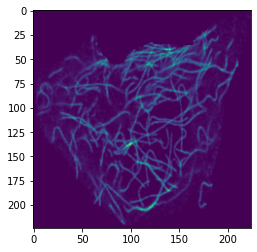

In [12]:
plt.imshow(data_t['image'][5][:,:,0])

In [2]:
import os

In [3]:
file_list = os.listdir('../data/train_h5_224')

## issue files

week mask detection for the following img
'7930e80e-bbc8-11e8-b2bc-ac1f6b6435d0'


understanding :

    there are many images where the nuclie is not there . on those images, the mask detection is suffering . an indepth analysis on the following images are required to incorporate these studies into our final model.

7930e80e-bbc8-11e8-b2bc-ac1f6b6435d0      only one mask is detected

21f3ec6a-bbb6-11e8-b2ba-ac1f6b6435d0      only one cell is there in the entire image

10688f2a-bbc8-11e8-b2bc-ac1f6b6435d0      detected mask of 5 object from ~10 actual cell. the detected calls are smaller than 30K area

940f418a-bba4-11e8-b2b9-ac1f6b6435d0      only 3 cell in the entire image and the mask does not detect any cell

bb9a63c8-bbaf-11e8-b2ba-ac1f6b6435d0      only 3 mask is detected and the mask are not fully detecting cell in the image

In [6]:
mean_red    = [] 
mean_yellow = []
mean_green  = []
mean_blue   = []

std_red    = [] 
std_yellow = []
std_green  = []
std_blue   = []

file_list = [v for v in file_list if v != '.ipynb_checkpoints']

for i in tqdm(file_list):
    #hdf5_file = h5py.File(os.path.join('../data/train_h5_224',i),"r")
    with h5py.File(os.path.join('../data/train_h5_224',i),"r") as hdf5_file:
        #print(os.path.join('../data/train_h5_224',i))
        train_x = hdf5_file['train_img'][...]
        
        if len(train_x.shape) == 4:
            mean_red.append(train_x[:,:,:,0].mean())
            mean_yellow.append(train_x[:,:,:,1].mean())
            mean_green.append(train_x[:,:,:,2].mean())
            mean_blue.append(train_x[:,:,:,3].mean())

            std_red.append(train_x[:,:,:,0].std())
            std_yellow.append(train_x[:,:,:,1].std())
            std_green.append(train_x[:,:,:,2].std())
            std_blue.append(train_x[:,:,:,3].std())
        else:
            print(train_x.shape)
            print(os.path.join('../data/train_h5_224',i))
    

  2%|▏         | 340/21806 [00:13<16:52, 21.19it/s]

(0,)
../data/train_h5_224/7930e80e-bbc8-11e8-b2bc-ac1f6b6435d0.hdf5


 18%|█▊        | 3894/21806 [03:19<14:30, 20.57it/s]  

(0,)
../data/train_h5_224/21f3ec6a-bbb6-11e8-b2ba-ac1f6b6435d0.hdf5


 38%|███▊      | 8197/21806 [07:02<08:13, 27.57it/s]  

(0,)
../data/train_h5_224/10688f2a-bbc8-11e8-b2bc-ac1f6b6435d0.hdf5


 39%|███▉      | 8590/21806 [07:21<09:02, 24.37it/s]

(0,)
../data/train_h5_224/940f418a-bba4-11e8-b2b9-ac1f6b6435d0.hdf5


 99%|█████████▉| 21575/21806 [18:35<00:08, 28.43it/s]  

(0,)
../data/train_h5_224/bb9a63c8-bbaf-11e8-b2ba-ac1f6b6435d0.hdf5


100%|██████████| 21806/21806 [18:47<00:00, 19.34it/s]


In [8]:
mean_red = np.array(mean_red)
mean_yellow = np.array(mean_yellow)
mean_green = np.array(mean_green)
mean_blue = np.array(mean_blue)

std_red = np.array(std_red)
std_yellow = np.array(std_yellow)
std_green = np.array(std_green)
std_blue = np.array(std_blue)

In [9]:
print(f'mean red {mean_red.mean()},mean_yellow {mean_yellow.mean()},mean_yellow {mean_green.mean()},mean_yellow {mean_blue.mean()},')

mean red 0.083170892049318,mean_yellow 0.08627143702844145,mean_yellow 0.05734662013795027,mean_yellow 0.06582942296076659,


In [10]:
print(f'std_red {std_red.mean()},std_yellow {std_yellow.mean()},std_green {std_green.mean()},std_blue {std_blue.mean()},')

std_red 0.13561066140407024,std_yellow 0.13301454127989584,std_green 0.09142918497144226,std_blue 0.15651865713966945,


## checking the quality

some of the files are dound to be not having any cell. need to check abt them


In [8]:
hdf5_file = h5py.File('../data/train_h5_224/8f17b5f4-bbae-11e8-b2ba-ac1f6b6435d0.hdf5',"r")
train_x = hdf5_file['train_img'][...]
print(train_x.shape)

(0,)


In [27]:
im_tok = '21f3ec6a-bbb6-11e8-b2ba-ac1f6b6435d0'
img_red    = imageio.imread(os.path.join('../data/train',f'{im_tok}_red.png'))
img_yellow = imageio.imread(os.path.join('../data/train',f'{im_tok}_yellow.png'))
img_green  = imageio.imread(os.path.join('../data/train',f'{im_tok}_green.png'))
img_blue   = imageio.imread(os.path.join('../data/train',f'{im_tok}_blue.png'))

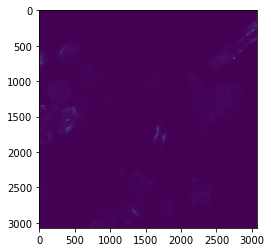

In [32]:
plt.imshow(img_green)

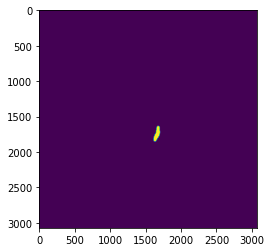

In [33]:
img_mask = np.load(os.path.join('../data/hpa_cell_mask',im_tok+'.npz'))['arr_0'].astype(np.uint8)
plt.imshow(img_mask)

## utilizing the cell_mask_study for doing future works

In [ ]:
#merge cell_mask_study and train_fold_v1 csv

In [43]:
cell_m_s = pd.read_csv('../data/cell_mask_study.csv')
cell_m_s = cell_m_s.rename(columns = {'token': 'ID'})
train_df = pd.read_csv('../data/train_fold_v1.csv')

In [44]:
cell_m_s.head()

,Unnamed: 0,ID,total_cell_mask,selected_cells
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8,7
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,15,15
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,17,16
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,17,17
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,45,43


In [45]:
train_df.head()

,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,fold
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
cell_m_s = train_df.merge(cell_m_s, on = 'ID')

In [49]:
cell_m_s.columns

Index(['Unnamed: 0_x', 'ID', 'Label', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', 'fold',
       'Unnamed: 0_y', 'total_cell_mask', 'selected_cells'],
      dtype='object')

In [51]:
cell_m_s = cell_m_s.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis= 1)

In [52]:
cell_m_s.to_csv('../data/cell_mask_study.csv')

In [2]:
img_mask = np.load(os.path.join('../data/test_mask','0040581b-f1f2-4fbe-b043-b6bfea5404bb.npz'))['arr_0'].astype(np.uint8)

In [3]:
img_mask.shape

(2048, 2048)

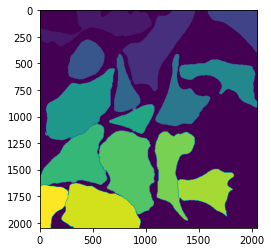

In [4]:
plt.imshow(img_mask)

In [4]:
hdf5_path = os.path.join('../data/test_h5_224_30000','0040581b-f1f2-4fbe-b043-b6bfea5404bb',f'{"0040581b-f1f2-4fbe-b043-b6bfea5404bb"}_1.hdf5')
hdf5_file = h5py.File(hdf5_path,"r")
train_x = hdf5_file['test_img'][...]
train_x.shape

(224, 224, 4)

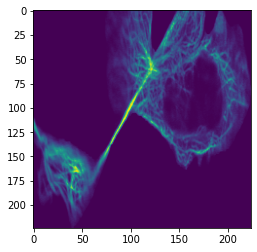

In [9]:
plt.imshow(train_x[:,:,0])